In [53]:
%config Completer.use_jedi = False

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import sys
sys.path.append('../')
sys.path.append("../../muon_regression/")

from data_processing import hl_features

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from scipy.stats import gaussian_kde

# Compute v0-v1 and reproduce their graphs

In [1]:
hl_features.muon_features(features=[hl_features.v0, hl_features.v1], 
                          use_files='../use_files.txt',
                          write=True,
                          output_file='../data/v0_v1.csv',
                          threshold=0.1)

In [3]:
v0_v1 = pd.read_csv('../data/v0_v1.csv')

In [5]:
v0_v1.v1.sort_values()

113299      2.431611
392092      2.458893
4795        2.463428
303904      2.465521
144922      2.475956
             ...    
62056     229.572321
346918    230.048798
89250     231.603056
31700     290.236494
27987     327.210110
Name: v1, Length: 396000, dtype: float64

In [6]:
with open(f"../data/v0_density.pickle", 'rb') as file:
        z0 = pickle.load(file)
with open(f"../data/v1_density.pickle", 'rb') as file:
        z1 = pickle.load(file)

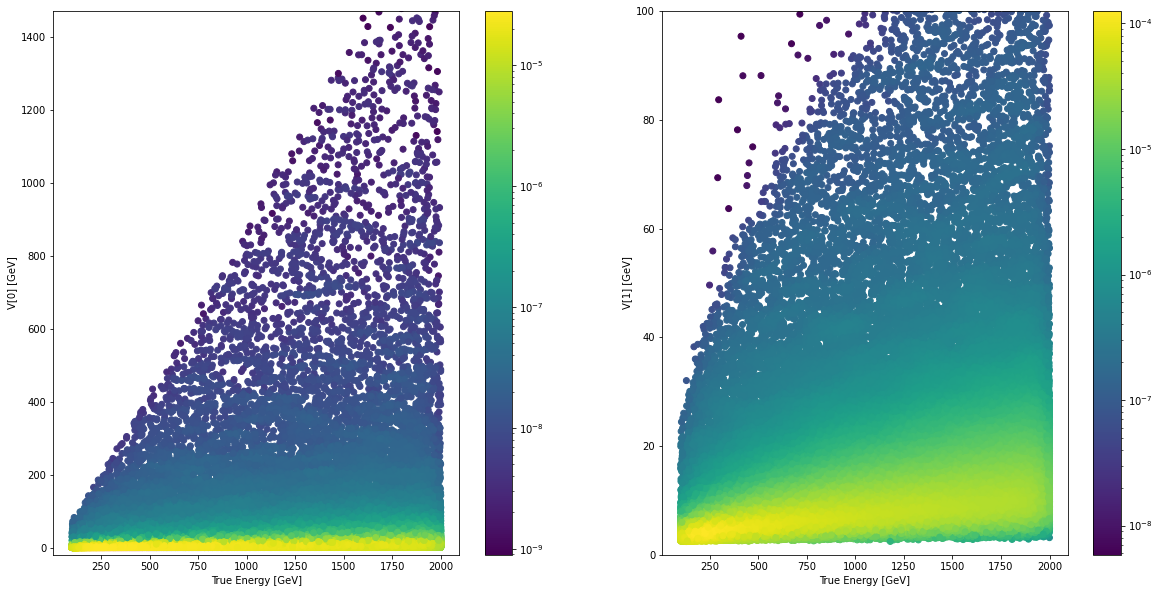

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

v0_plot = ax[0].scatter(x=v0_v1.true_energy, y=v0_v1.loc[:, 'v0'], c=z0, norm=matplotlib.colors.LogNorm())
ax[0].set(xlabel='True Energy [GeV]', ylabel = f'V[0] [GeV]', ylim=(-20, 1470))
fig.colorbar(v0_plot, ax=ax[0])

v1_plot = ax[1].scatter(x=v0_v1.true_energy, y=v0_v1.loc[:, 'v1'], c=z1, norm=matplotlib.colors.LogNorm())
ax[1].set(xlabel='True Energy [GeV]', ylabel = f'V[1] [GeV]', ylim=(0, 100))
fig.colorbar(v1_plot, ax=ax[1])

# Data from ROOT macro

### Check for differences with v0v1 above

In [4]:
data = pd.read_csv('../data/MuEloss_correct.csv', sep=' ')
data.head()

,v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9],v[10],v[11],v[12],v[13],v[14],v[15],true_energy,correct_true_energy
0,1.68273,6.15407,0.578249,1.269930,123.0730,46.68700,53.8146,144.4130,154.280,104.0630,1.0,5.0,0.970702,3.0,3.0,0.442111,655.700,655.69965
1,0.22672,3.22143,1.506160,1.407130,93.6621,4.45421,62.9253,37.8311,144.423,136.3770,1.0,2.0,0.226720,0.0,0.0,0.000000,136.523,136.52315
2,4.75289,9.47245,1.025090,0.150712,205.4830,630.37700,187.4360,147.5070,188.613,174.3480,1.0,6.0,1.688000,5.0,4.0,1.251760,702.982,702.98157
3,18.28610,15.39850,0.589862,0.355303,177.0400,174.67700,172.9010,153.4930,156.043,321.6490,1.0,33.0,14.621800,6.0,6.0,1.304280,1536.120,1536.12390
4,6.80569,9.03234,0.933928,0.546600,159.8110,6.22464,118.5770,149.9570,340.829,95.4652,1.0,17.0,6.159160,2.0,2.0,0.502743,1062.760,1062.75850


They are not ordered the same way, this could influence plots since matplotlib puts later points on top

In [5]:
v0_v1.head()

,true_energy,v0,v1
0,655.699630,1.682727,6.154067
1,136.523152,0.226720,3.221433
2,702.981571,4.752888,9.472453
3,1536.123958,18.286108,15.398491
4,1062.758499,6.805694,9.032339


### There are some examples for which true_energy does not correspond to same values of v0 and v1...it's not just ordering of obs?

v0_v1 is the one I computed directly from root files transformed to hdf5. data instead is the one coming from c++ macro

<b> It seems that the c++ macro is computing v0 and v1 in a different way for some points. They have a lot of zeros in v1

---- example 1 ----

In [8]:
v0_v1.loc[abs(v0_v1.true_energy - 278.569463) < 0.00001, :]

,true_energy,v0,v1
197999,278.569463,30.635439,19.150993


In [9]:
data.loc[data['correct_true_energy'] == 278.56946, :]

,v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9],v[10],v[11],v[12],v[13],v[14],v[15],true_energy,correct_true_energy
143999,49.7864,0.0,0.505611,0.505611,185.549,135.357,202.484,32.9117,127.753,192.558,1.0,253.0,0.872192,736.0,626.0,5.04015,278.569,278.56946


---- example 2 ----

In [10]:
v0_v1.loc[abs(v0_v1.true_energy - 325.086060) < 0.001, :]

,true_energy,v0,v1
255599,325.086072,28.501786,16.761336


In [11]:
28.501786+16.761336

45.263121999999996

In [12]:
data.loc[data['correct_true_energy'] == 325.086060, :]

,v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9],v[10],v[11],v[12],v[13],v[14],v[15],true_energy,correct_true_energy
197999,45.2631,0.0,0.717206,0.717206,182.896,64.22,200.775,187.476,106.223,174.343,1.0,198.0,0.605018,554.0,552.0,3.16322,325.086,325.08606


### try ordering DATA in the same way as V0_V1 and see if the plots are similar

In [10]:
merged = pd.merge_asof(left=data.loc[:, ['v[0]', 'v[1]', 'true_energy', 'correct_true_energy']].sort_values(by='correct_true_energy').rename(columns={'true_energy': 'true_energy_data'}), 
                       right=v0_v1.loc[:, ['true_energy', 'v0', 'v1']].sort_values(by='true_energy').rename(columns={'true_energy': 'true_energy_v0v1'}), 
                       left_on='correct_true_energy', 
                       right_on='true_energy_v0v1', direction='nearest')  
merged

,v[0],v[1],true_energy_data,correct_true_energy,true_energy_v0v1,v0,v1
0,1.14041,5.56736,100.003,100.002660,100.002662,1.140409,5.567357
1,2.80289,0.00000,100.007,100.007060,100.007058,0.000000,2.802887
2,3.22408,0.00000,100.009,100.009315,100.009315,0.134055,3.090026
3,3.64237,0.00000,100.010,100.010376,100.010376,0.250414,3.391959
4,4.63372,0.00000,100.011,100.011444,100.011445,0.255659,4.378062
...,...,...,...,...,...,...,...
395995,8.11009,0.00000,1999.980,1999.977800,1999.977759,1.974045,6.136049
395996,19.88430,0.00000,1999.980,1999.981200,1999.981198,8.005069,11.879238
395997,54.19210,0.00000,1999.980,1999.981600,1999.981529,30.095099,24.096981
395998,42.54630,0.00000,1999.980,1999.983600,1999.983646,23.893570,18.652776


In [13]:
merged_final = v0_v1.merge(merged, left_on=['true_energy', 'v0', 'v1'], right_on=['true_energy_v0v1', 'v0', 'v1'], how='inner').drop(columns=['true_energy_v0v1'])
merged_final

,true_energy,v0,v1,v[0],v[1],true_energy_data,correct_true_energy
0,655.699630,1.682727,6.154067,1.68273,6.15407,655.700,655.69965
1,136.523152,0.226720,3.221433,0.22672,3.22143,136.523,136.52315
2,702.981571,4.752888,9.472453,4.75289,9.47245,702.982,702.98157
3,1536.123958,18.286108,15.398491,18.28610,15.39850,1536.120,1536.12390
4,1062.758499,6.805694,9.032339,6.80569,9.03234,1062.760,1062.75850
...,...,...,...,...,...,...,...
395995,456.569128,0.255201,3.602214,3.85742,0.00000,456.569,456.56912
395996,952.326186,0.729934,4.369923,5.09986,0.00000,952.326,952.32620
395997,534.429857,9.217948,9.467583,18.68550,0.00000,534.430,534.42990
395998,485.516879,0.000000,3.341851,3.34185,0.00000,485.517,485.51688


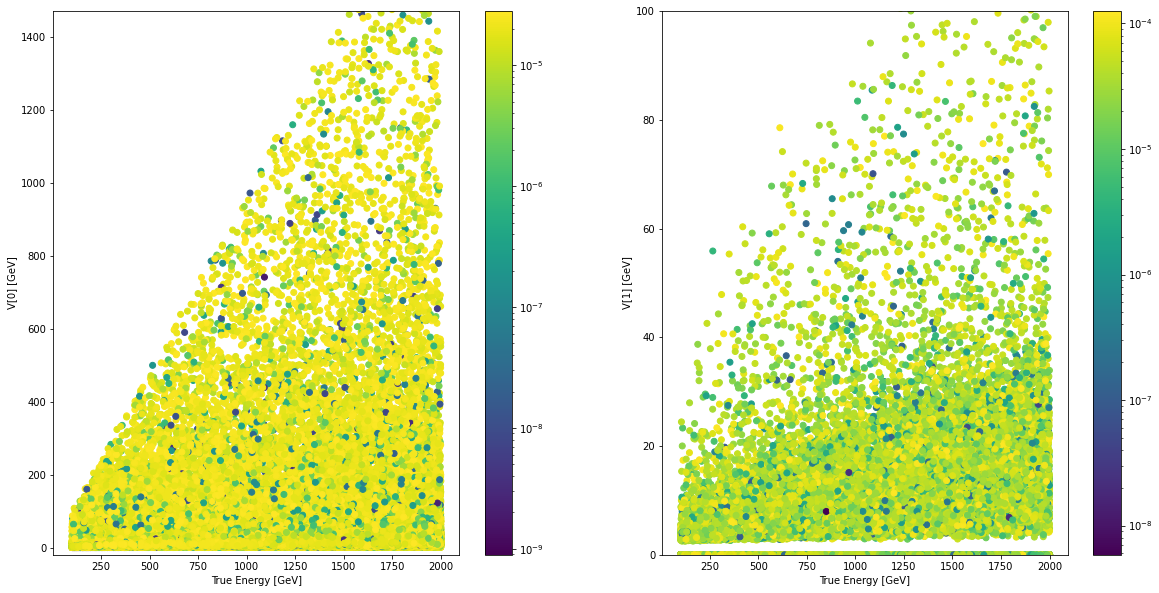

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

v0_plot = ax[0].scatter(x=merged_final.correct_true_energy, y=merged_final.loc[:, 'v[0]'], c=z0, norm=matplotlib.colors.LogNorm())
ax[0].set(xlabel='True Energy [GeV]', ylabel = f'V[0] [GeV]', ylim=(-20, 1470))
fig.colorbar(v0_plot, ax=ax[0])

v1_plot = ax[1].scatter(x=merged_final.correct_true_energy, y=merged_final.loc[:, 'v[1]'], c=z1, norm=matplotlib.colors.LogNorm())
ax[1].set(xlabel='True Energy [GeV]', ylabel = f'V[1] [GeV]', ylim=(0, 100))
fig.colorbar(v1_plot, ax=ax[1])

## Density plots (see Tommaso's August 2020 paper, figure 3-4, page 7-8)

Minor differences might also be due to the fact that we have 15000 observations less than the full dataset used in the paper

<b> Things to note:
- v[6], v[7], v[8] and v[9] seem to follow a slightly different scale
- v[10] has only 0 or 1 value, hence it makes more sense to use a barplot
- v[11] seems to be the most different in terms of density: between 0 and 100 my graph has an upward trend, while theirs is always going down. I also don't understand why they cap the max value at 100 given its distribution (see cells below)
- v[12] and v[13] seem quite different from theirs in the first part of the density
- v[15] breaks off way before theirs

Can the above differences be reconciled simply with the absence of 15000 data points?

In [48]:
data.loc[:, ['true_energy', 'v[10]']].groupby('v[10]').count()

,true_energy
v[10],
0.0,1196
1.0,394804


In [63]:
data.loc[:, 'v[11]'].describe()

count    396000.000000
mean        249.121258
std         265.454244
min           0.000000
25%          58.000000
50%         147.000000
75%         310.000000
max        1002.000000
Name: v[11], dtype: float64

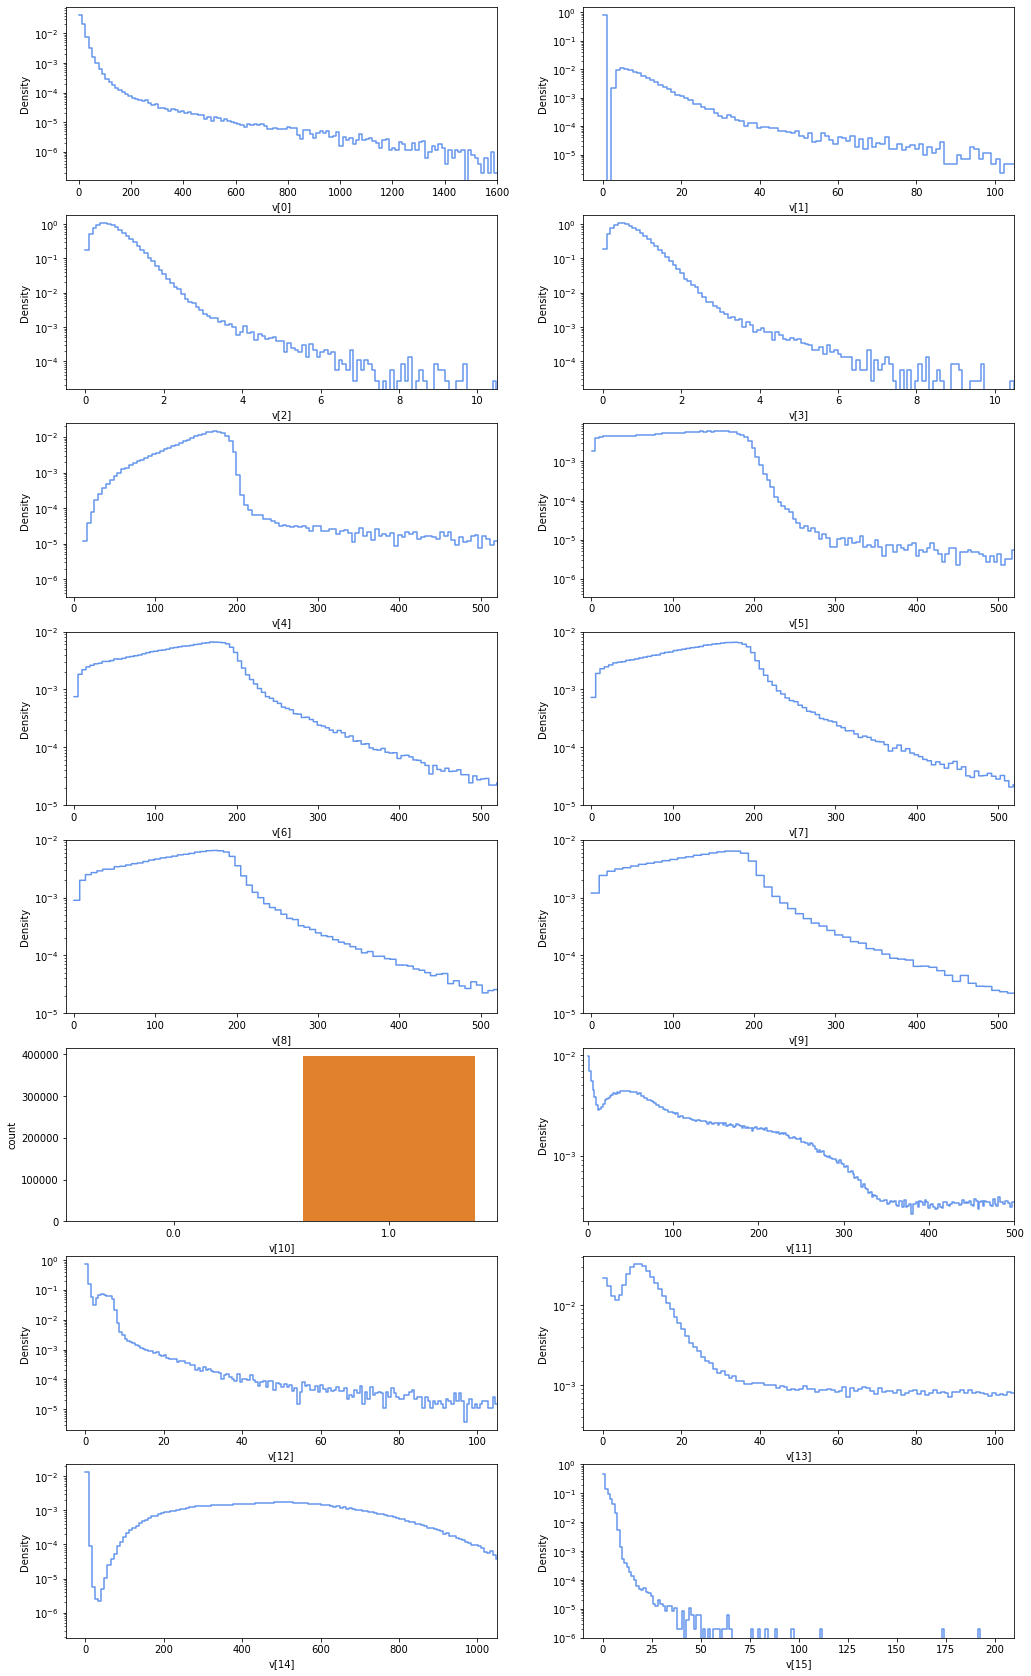

In [54]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(17,30))
i = 0
for row in range(8):
    for col in range(2):
        if i == 10:
            sns.countplot(x=data.loc[:, f'v[{i}]'], ax=ax[row][col])
            i += 1
        else:
            bins = 200
            if i == 0:
                ax[row][col].set_xlim(left= -50, right=1600)
                bins = 150
            elif i == 1:
                ax[row][col].set_xlim(left= -5, right=105)
            elif i == 2:
                ax[row][col].set_xlim(left=-0.5, right=10.5)
            elif i == 3:
                ax[row][col].set_xlim(left=-0.5, right=10.5)
            elif (i == 4):
                ax[row][col].set_xlim(left= -10, right=520)
                bins = 300
            elif (i == 5):
                ax[row][col].set_xlim(left= -10, right=520)
                bins = 400
            elif (i == 6) or (i == 7) or (i == 8) or (i == 9):
                ax[row][col].set_xlim(left= -10, right=520)
                ax[row][col].set_ylim(bottom= 1e-5, top=1e-2)
                bins = 800
            elif (i == 11):
                ax[row][col].set_xlim(left=-5, right=500)
                bins = 500
            elif (i == 12):
                ax[row][col].set_xlim(left=-5, right=105)
                bins = 2500
            elif i == 13:
                ax[row][col].set_xlim(left=-5, right=105)
                bins = 1000
            elif i == 14:
                ax[row][col].set_xlim(left=-50, right=1050)
            elif i == 15:
                ax[row][col].set_ylim(bottom=1e-6, top=1e0)
                ax[row][col].set_xlim(left=-10, right=210)
                bins = 400
            else:
                ax[row][col].set_xlim(left= -10, right=520)
            ax[row][col].set_yscale('log')
            ax[row][col].set_yscale('log')
            n_unique_obs = len(data.loc[:, f'v[{i}]'].unique())
            #sns.distplot(data.loc[:, f'v[{i}]'], ax=ax[row][col], kde=False, bins=bins, 
            #             hist_kws={"histtype": "step"}, color='blue', norm_hist=True)
            sns.histplot(data.loc[:, f'v[{i}]'], ax=ax[row][col], bins=bins, stat='density', element='step', color='cornflowerblue', fill=False)
            i += 1

## Scatterplots (see Tommaso's August 2020 paper, figure 5, page 9)

#### Estimate point density to build color gradient

In [28]:
xy_v0 = np.vstack([data.correct_true_energy, data.loc[:, 'v[0]']])
z0 = gaussian_kde(xy_v0)(xy_v0)

xy_v1 = np.vstack([data.correct_true_energy, data.loc[:, 'v[1]']])
z1 = gaussian_kde(xy_v1)(xy_v1)

In [30]:
with open('./../data/v1_density.pickle', 'wb') as file:
    pickle.dump(z1, file)

### Plots

In [ ]:
sns.jointplot(x=data.correct_true_energy, y=data.loc[:, 'v[0]'], ylim=(-1, 100), kind='hist', height=10, marginal_kws=dict(bins=100))

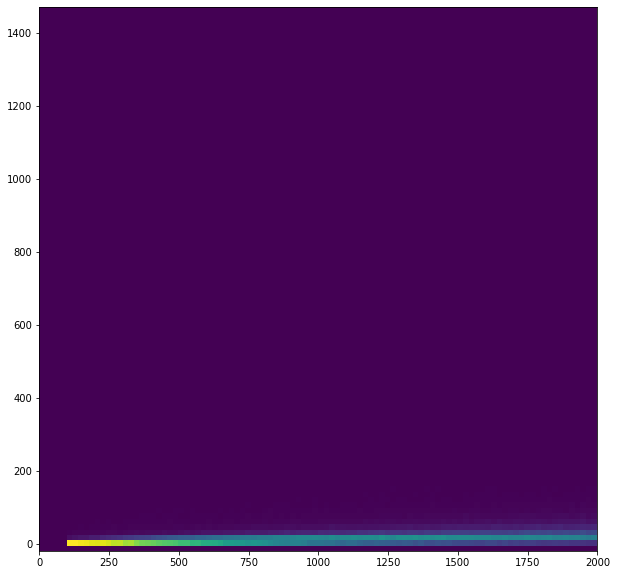

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist2d(x=data.correct_true_energy, y=data.loc[:, 'v[0]'], bins=100, alpha=1.5, range=[[0, 2000], [-20, 1470]])
plt.show()

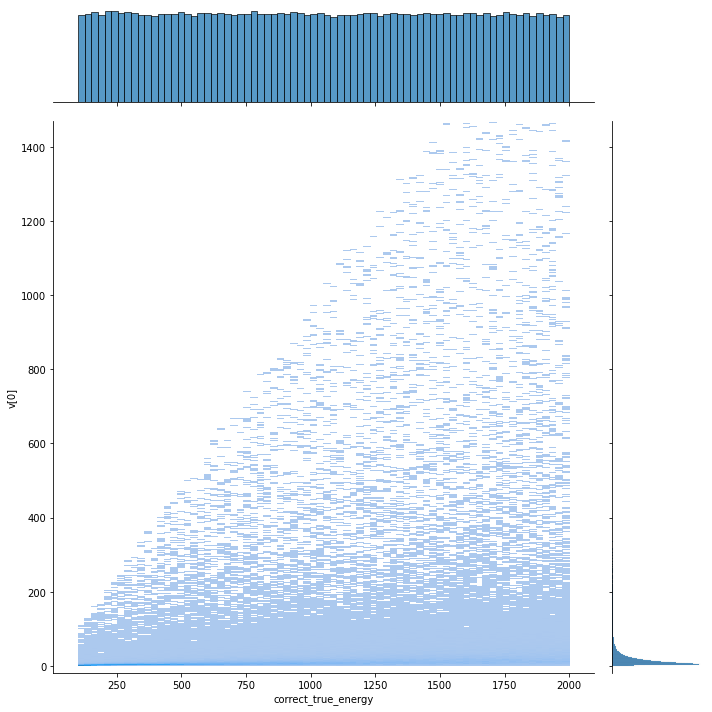

In [20]:
sns.jointplot(x=data.correct_true_energy, y=data.loc[:, 'v[0]'], ylim=(-20, 1470), kind='hist', height=10)

[(-1.0, 100.0), Text(0, 0.5, 'V[1] [GeV]'), Text(0.5, 0, 'True Energy [GeV]')]

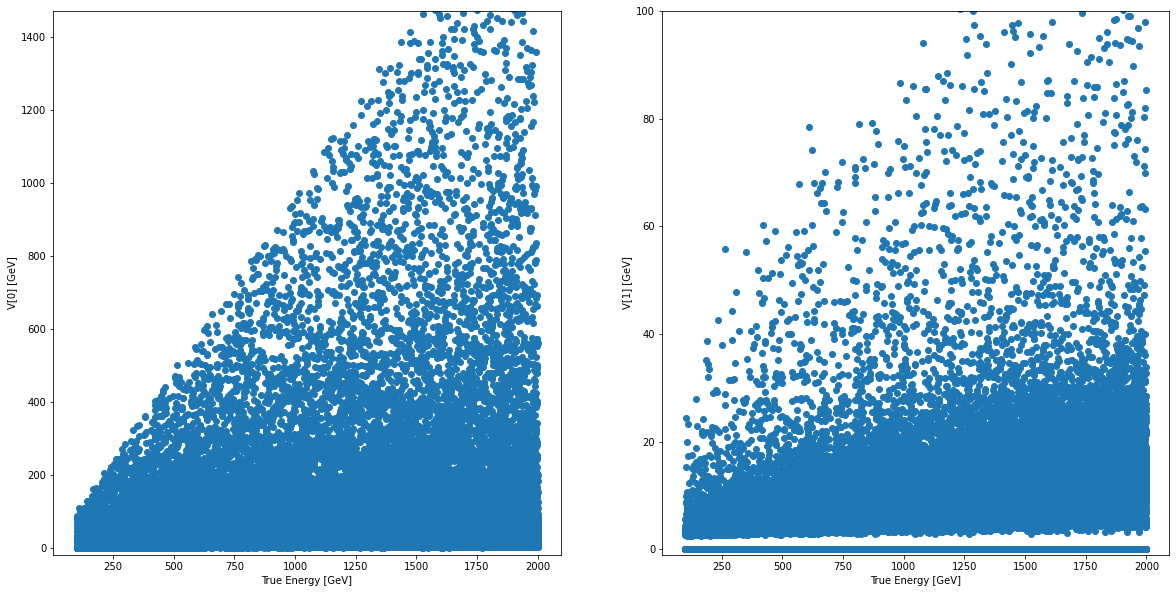

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

v0_plot = ax[0].scatter(x=data.correct_true_energy, y=data.loc[:, 'v[0]'])
ax[0].set(xlabel='True Energy [GeV]', ylabel = f'V[0] [GeV]', ylim=(-20, 1470))

v1_plot = ax[1].scatter(x=data.correct_true_energy, y=data.loc[:, 'v[1]'])
ax[1].set(xlabel='True Energy [GeV]', ylabel = f'V[1] [GeV]', ylim=(-1, 100))

In [27]:
with open(f"../data/v2_density.pickle", 'rb') as file:
        z2 = pickle.load(file)
with open(f"../data/v3_density.pickle", 'rb') as file:
        z3 = pickle.load(file)

In [34]:
idx_shuffled = np.random.permutation(range(396000))
z2_shuffled = z2[idx_shuffled]
z3_shuffled = z3[idx_shuffled]

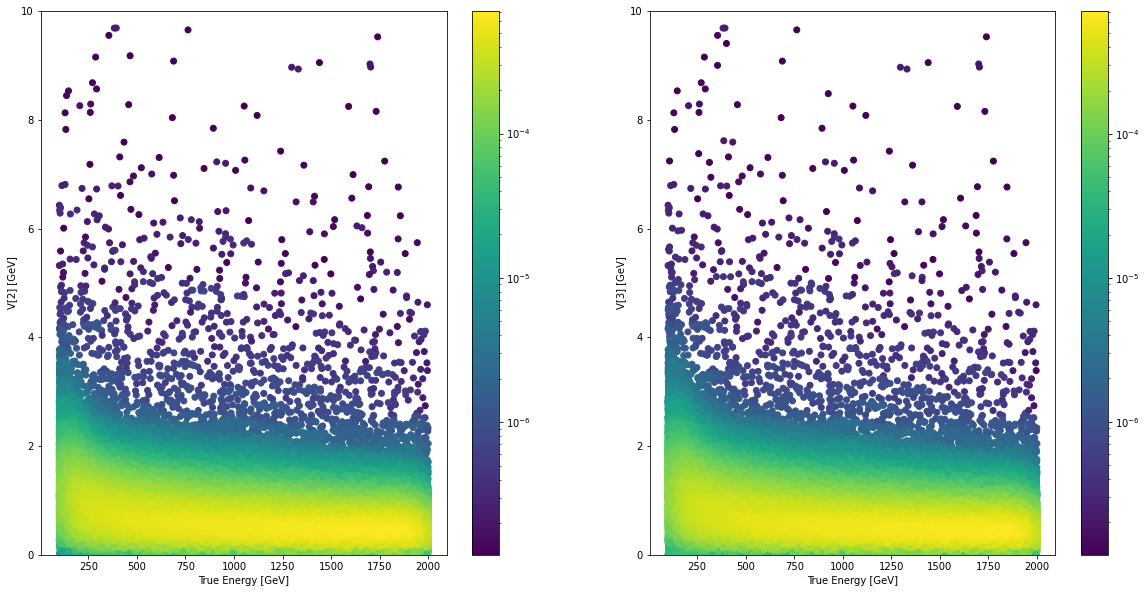

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

v2_plot = ax[0].scatter(x=data.correct_true_energy[idx_shuffled], y=data.loc[idx_shuffled, 'v[2]'], c=z2_shuffled, norm=matplotlib.colors.LogNorm())
ax[0].set(xlabel='True Energy [GeV]', ylabel = f'V[2] [GeV]', ylim=(0, 10))
fig.colorbar(v2_plot, ax=ax[0])

v3_plot = ax[1].scatter(x=data.correct_true_energy[idx_shuffled], y=data.loc[idx_shuffled, 'v[3]'], c=z3_shuffled, norm=matplotlib.colors.LogNorm())
ax[1].set(xlabel='True Energy [GeV]', ylabel = f'V[3] [GeV]', ylim=(0, 10))
fig.colorbar(v3_plot, ax=ax[1])

In [80]:
n_features = 2
densities = dict()
for i in range(n_features):    
    with open(f"../data/v{i}_density.pickle", 'rb') as file:
        densities[f'v{i}'] = pickle.load(file)

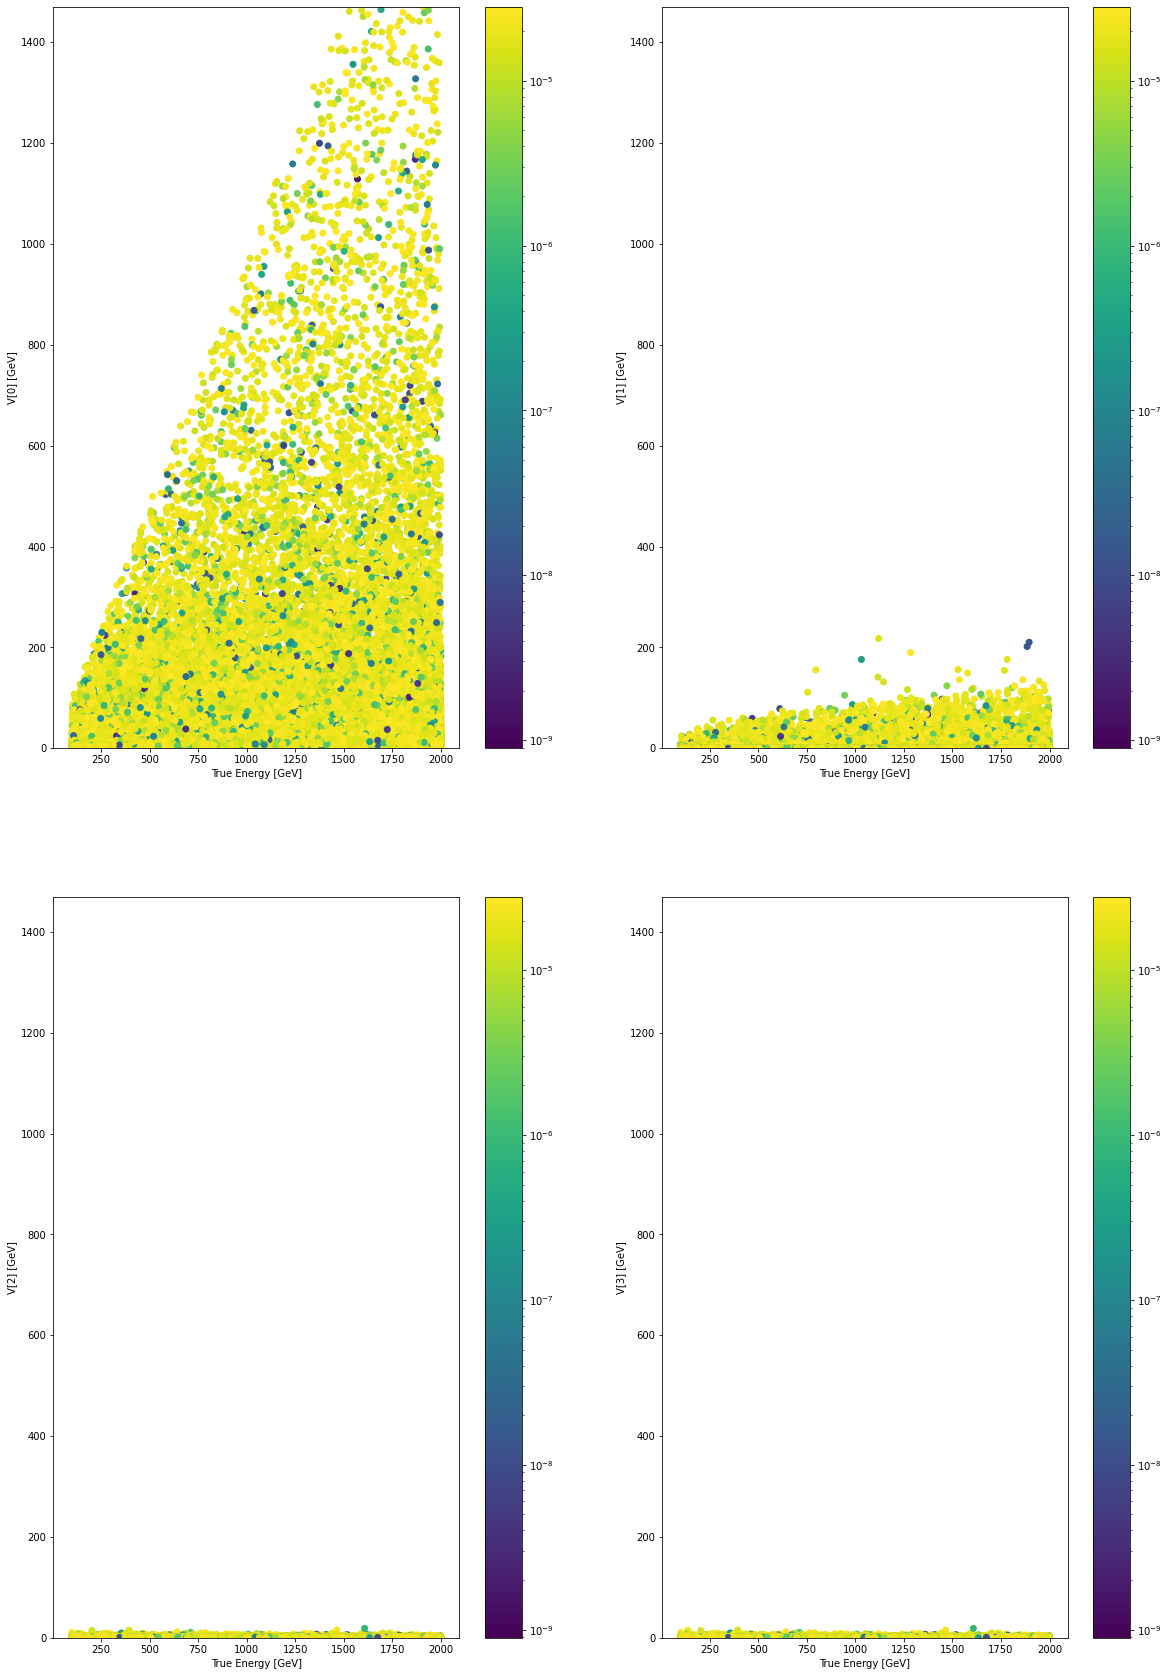

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,30))

i = 0
for row in range(2):
    for col in range(2):
        if i == 0:
            ylim_right = 1470
        vi_plot = ax[row][col].scatter(x=data.true_energy, y=data.loc[:, f'v[{i}]'], c=densities[f'v{i}'], norm=matplotlib.colors.LogNorm())
        ax[row][col].set(xlabel='True Energy [GeV]', ylabel = f'V[{i}] [GeV]', ylim=(0, ylim_right))
        fig.colorbar(vi_plot, ax=ax[row][col])
        i += 1

        #v1_plot = ax[1].scatter(x=data.true_energy, y=data.v1, c=z1, norm=matplotlib.colors.LogNorm())
        #ax[1].set(xlabel='True Energy [GeV]', ylabel = f'V[1] [GeV]', ylim=(0, 98))
        #fig.colorbar(v1_plot, ax=ax[1])